In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13658 (delta 2), reused 1 (delta 0), pack-reused 13652
Receiving objects: 100% (13658/13658), 12.26 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (9314/9314), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [5]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-11 09:59:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights       13%[=>                  ]  32.65M   117KB/s    eta 30m 13s^C


In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 134___10	      'Colab Notebooks'			  today1.jpg
 20191001_170628.jpg   Dataset.zip			  yolov3
 20191006_162945.jpg  'New Doc 2019-10-13 23.12.56.pdf'   yolov3_1
 bday.jpg	       sktch.jpg


In [8]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3_1

backup			object_detection.ipynb	VID-20190302-WA0021.mp4
generate_train.py	obj.names		VID-20200609-WA0007.mp4
generate_train.py.gdoc	obj.zip			video.mp4
meme.jpg		results2.mp4		yolov3_custom.cfg
obj.data		results3.mp4		yolov3_testing.cfg


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3_1/obj.zip ../

In [11]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ../obj.zip or
        ../obj.zip.zip, and cannot find ../obj.zip.ZIP, period.


KeyboardInterrupt: ignored

In [0]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3_1/yolov3_custom.cfg ./cfg

In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3_1/obj.names ./data
!cp /mydrive/yolov3_1/obj.data  ./data

In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3_1/generate_train.py ./

In [16]:
!python generate_train.py

Traceback (most recent call last):
  File "generate_train.py", line 4, in <module>
    os.chdir(os.path.join("data", "Data"))
FileNotFoundError: [Errno 2] No such file or directory: 'data/Data'


In [0]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     dog.jpg	 horses.jpg		   obj.data	     scream.jpg
coco9k.map  eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco.names  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
Data	    goal.txt	 labels			   person.jpg


In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-06-11 04:55:13--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   278KB/s    in 10m 44s 

2020-06-11 05:05:58 (246 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

/bin/bash: ./darknet: Is a directory


In [0]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_1/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 450670, rewritten_bbox = 0.730246 % 

 15926: 1.241983, 1.059449 avg loss, 0.000010 rate, 5.599774 seconds, 1019264 images, 0.173812 hours left
Loaded: 0.000069 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.712176, GIOU: 0.699058), Class: 0.993096, Obj: 0.040502, No Obj: 0.000600, .5R: 1.000000, .75R: 0.000000, count: 2, class_loss = 0.516396, iou_loss = 0.086205, total_loss = 0.602600 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.607516, GIOU: 0.572723), Class: 0.866572, Obj: 0.085471, No Obj: 0.000533, .5R: 0.750000, .75R: 0.125000, count: 8, class_loss = 2.204947, iou_loss = 0.890618, total_loss = 3.095566 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.700296, GIOU: 0.685165), Class: 0.994834, Obj: 0.046083, No Obj: 0.000114, .5R: 1.000000, .75R: 0.285714, count: 7, class_loss = 1.651461, iou_loss = 0.560609, total_loss = 2.212069 
 to

In [0]:
#importing testing cfg
!cp /mydrive/yolov3_1/yolov3_testing.cfg ./cfg

In [35]:
#video testing
!./darknet detector demo data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3_1/backup/yolov3_custom_15000.weights -dont_show /mydrive/yolov3_1/kolkata.mp4 -i 0 -out_filename /mydrive/yolov3_1/results9.mp4

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:

car: 32% 
bus: 29% 
bus: 28% 

FPS:13.4 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 33% 
bus: 27% 

FPS:13.4 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 31% 
bus: 30% 
bus: 26% 

FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 36% 
bus: 32% 
bus: 27% 

FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 33% 
bus: 35% 
bus: 30% 

FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 33% 
bus: 32% 
bus: 30% 

FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 34% 
bus: 32% 

FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 31% 
bus: 29% 

FPS:13.4 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

car: 29% 
bus: 29% 

FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

bus: 26% 

FPS:13.4 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:


FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:


FPS:13.4 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:


FPS:13.5 	 AVG_FPS:13.3

 cvWriteFrame 
Objects:

bus: 25% 

FPS:13.4 	

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

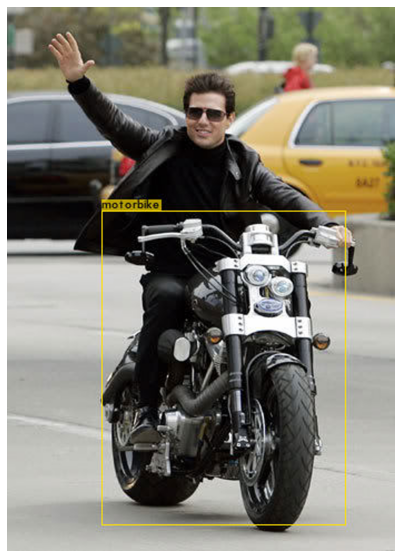

In [33]:
#testing image
!./darknet detector test data/obj.data cfg/yolov3_testing.cfg /mydrive/yolov3_1/backup/yolov3_custom_15000.weights /mydrive/yolov3_1/tom.jpg -thresh 0.3
imShow('predictions.jpg')